In [1]:
from empca_residuals import *
from comparison_plots import comp_R2
%pylab inline

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
def empca_compare(corr12=np.ones(7214),corr13=np.ones(7214)):

    longcorr12 = np.tile(corr12,(n6819_12.spectra_errs.shape[0],1))
    longcorr13 = np.tile(corr13,(n6819_13.spectra_errs.shape[0],1))
    
    Vdata12 = np.ma.var(n6819_12.residuals)
    Vnoise12 = np.ma.mean(n6819_12.spectra_errs**2)
    Vdata13 = np.ma.var(n6819_13.residuals)
    Vnoise13 = np.ma.mean(n6819_13.spectra_errs**2)


    n6819_12.pixelEMPCA(nvecs=5,deltR2=0,mad=False)
    n6819_13.pixelEMPCA(nvecs=5,deltR2=0,mad=False)
    print 'Simple analysis'
    print 'Vnoise12 = {0}, Vdata12 = {1},\nVnoise13 = {2}, Vdata13 = {3}'.format(Vnoise12,Vdata12,Vnoise13,Vdata13)
    print 'R2noise12 = {0}, R2noise13 = {1}'.format(1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13)
    print 'EMPCA'
    print 'Vnoise12 = {0}, Vdata12 = {1},\nVnoise13 = {2}, Vdata13 = {3}'.format(n6819_12.empcaModelWeight.Vnoise,n6819_12.empcaModelWeight.Vdata,n6819_13.empcaModelWeight.Vnoise,n6819_13.empcaModelWeight.Vdata)
    print 'R2noise12 = {0}, R2noise13 = {1}'.format(n6819_12.empcaModelWeight.R2noise,n6819_13.empcaModelWeight.R2noise)
    
    plt.figure(figsize=(10,8))
    plt.plot(n6819_12.empcaModelWeight.R2Array,label='DR12, R2noise = {0}'.format(n6819_12.empcaModelWeight.R2noise),lw=3,color='b')
    plt.plot(n6819_13.empcaModelWeight.R2Array,label='DR13, R2noise = {0}'.format(n6819_13.empcaModelWeight.R2noise),lw=3,color='r')
    plt.xlim(0,5)
    plt.ylim(0,1)
    plt.ylabel('R2')
    plt.xlabel('number of eigenvectors')
    plt.axhline(n6819_12.empcaModelWeight.R2noise,ls='--',lw=2,color='b') 
    plt.axhline(n6819_13.empcaModelWeight.R2noise,ls='--',lw=3,color='r')
    plt.legend(loc='best')

    plt.figure(figsize=(10,5))
    plt.plot(corr12,label='DR12')
    plt.plot(corr13,label='DR13')
    plt.xlim(0,7214)
    plt.xlabel('pixel')
    plt.ylabel('correction')
    plt.legend(loc='best')

    plt.figure(figsize=(10,5))
    plt.plot(corr12/corr13)
    plt.xlim(0,7214)
    plt.xlabel('pixel')
    plt.ylabel('DR12/DR13')

    plt.figure(figsize=(10,8))
    n6819_12.imshow(np.sqrt(n6819_12.spectra_errs**2/longcorr12)/np.sqrt(n6819_13.spectra_errs**2/longcorr13),title = 'ratio of uncorrected uncertainties (DR12/DR13)',cmap='plasma')
    
    plt.figure(figsize=(10,8))
    n6819_12.imshow(n6819_12.spectra_errs/n6819_13.spectra_errs,title = 'ratio of corrected uncertainties (DR12/DR13)',cmap='plasma')
    

In [18]:
npix=30
n6819_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_12.findResiduals()
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')
n6819_12.correctUncertainty(correction=corr12)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information


In [19]:
npix=30
n6819_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_13.findResiduals()
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')
n6819_13.correctUncertainty(correction=corr13)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information


       iter        R2             rchi2
EMPCA  1/25       0.02841933      1.28408186
EMPCA  2/25       0.43952738      0.72847226
EMPCA  3/25       0.48232930      0.68300931
EMPCA  4/25       0.49774979      0.66845632
EMPCA  5/25       0.50263241      0.66205926
EMPCA  6/25       0.50295083      0.65877325
EMPCA  7/25       0.50089158      0.65707290
EMPCA  8/25       0.49731979      0.65675062
EMPCA  9/25       0.49333114      0.65726420
EMPCA 10/25       0.48995433      0.65711658
EMPCA 11/25       0.49048699      0.65487969
EMPCA 12/25       0.49192511      0.65239666
EMPCA 13/25       0.49351309      0.65032947
EMPCA 14/25       0.49484336      0.64884083
EMPCA 15/25       0.49574366      0.64790547
EMPCA 16/25       0.49628715      0.64738041
EMPCA 17/25       0.49664042      0.64710961
EMPCA 18/25       0.49691802      0.64695991
EMPCA 19/25       0.49713540      0.64685661
EMPCA 20/25       0.49731205      0.64676668
EMPCA 21/25       0.49746365      0.64667826
EMPCA 22/25    

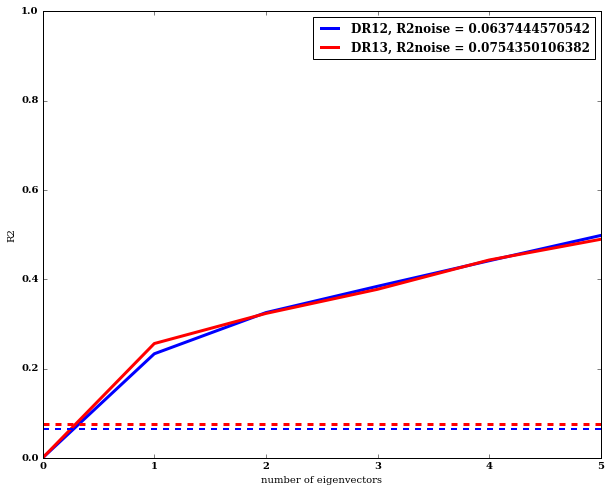

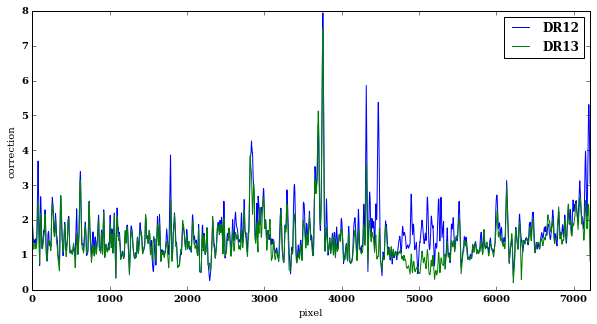

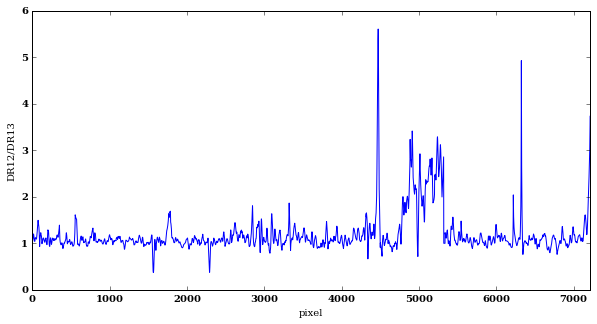

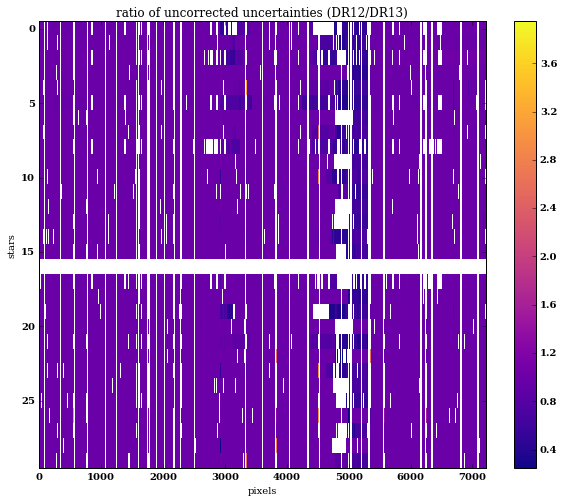

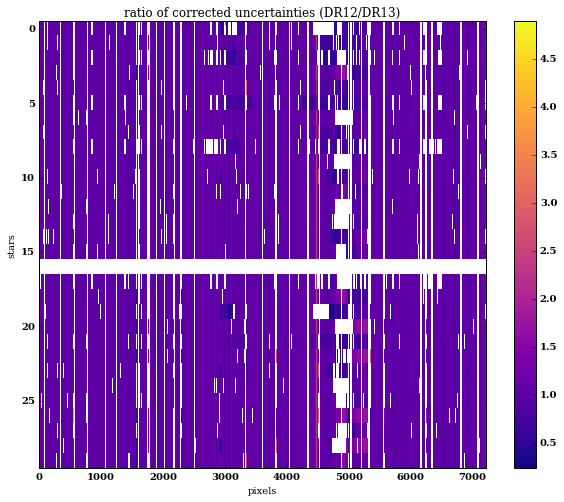

In [20]:
empca_compare(corr12=corr12,corr13=corr13)

In [21]:
npix=30
n6819_12.uncorrectUncertainty(correction=corr12)
n6819_12.findResiduals()
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')
n6819_12.correctUncertainty(correction=corr12)

In [22]:
npix=30
n6819_13.uncorrectUncertainty(correction=corr13)
n6819_13.findResiduals()
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')
n6819_13.correctUncertainty(correction=corr13)

       iter        R2             rchi2
EMPCA  1/25       0.02841933      1.28408186
EMPCA  2/25       0.43952738      0.72847226
EMPCA  3/25       0.48232930      0.68300931
EMPCA  4/25       0.49774979      0.66845632
EMPCA  5/25       0.50263241      0.66205926
EMPCA  6/25       0.50295083      0.65877325
EMPCA  7/25       0.50089158      0.65707290
EMPCA  8/25       0.49731979      0.65675062
EMPCA  9/25       0.49333114      0.65726420
EMPCA 10/25       0.48995433      0.65711658
EMPCA 11/25       0.49048699      0.65487969
EMPCA 12/25       0.49192511      0.65239666
EMPCA 13/25       0.49351309      0.65032947
EMPCA 14/25       0.49484336      0.64884083
EMPCA 15/25       0.49574366      0.64790547
EMPCA 16/25       0.49628715      0.64738041
EMPCA 17/25       0.49664042      0.64710961
EMPCA 18/25       0.49691802      0.64695991
EMPCA 19/25       0.49713540      0.64685661
EMPCA 20/25       0.49731205      0.64676668
EMPCA 21/25       0.49746365      0.64667826
EMPCA 22/25    

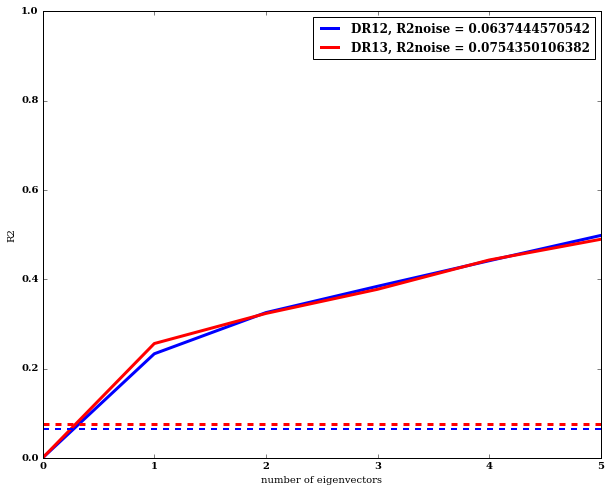

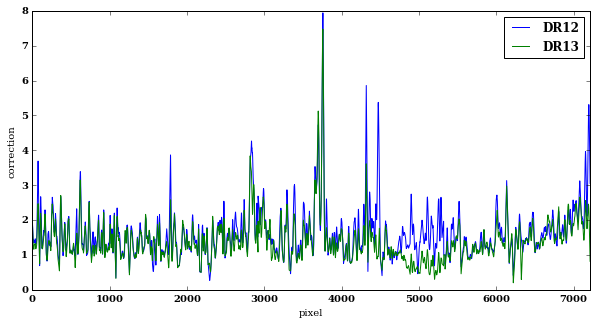

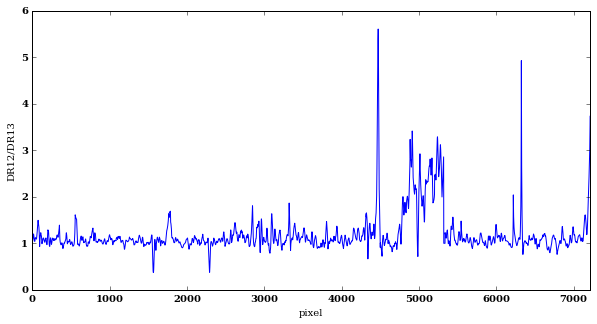

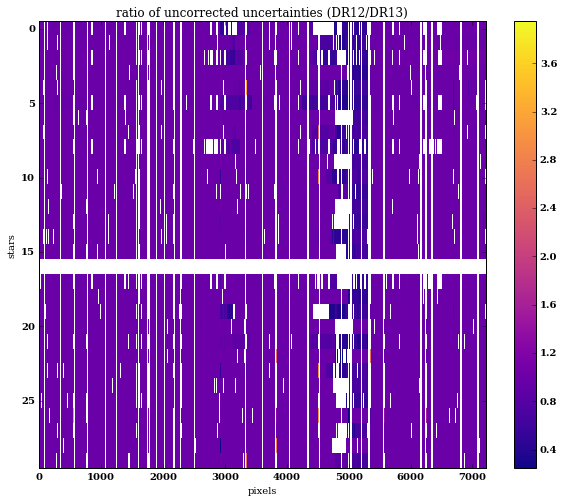

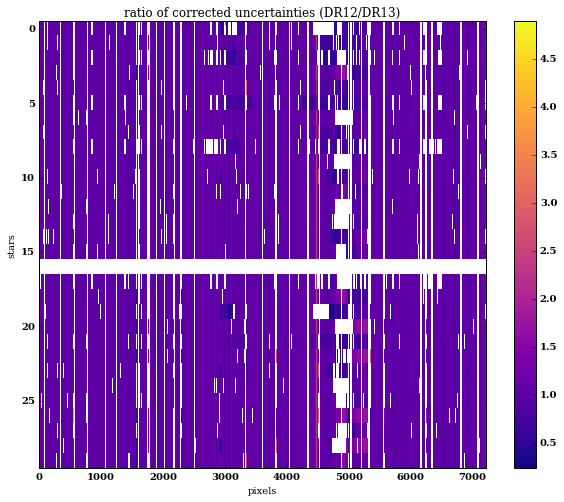

In [23]:
empca_compare(corr12=corr12,corr13=corr13)

In [27]:
npix=10
n6819_12.uncorrectUncertainty(correction=corr12)
n6819_12.findResiduals()
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')
n6819_12.correctUncertainty(correction=corr12)

In [28]:
npix=10
n6819_13.uncorrectUncertainty(correction=corr13)
n6819_13.findResiduals()
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')
n6819_13.correctUncertainty(correction=corr13)

       iter        R2             rchi2
EMPCA  1/25       0.02531113      1.18043224
EMPCA  2/25       0.43492547      0.72004253
EMPCA  3/25       0.48359593      0.67097242
EMPCA  4/25       0.49817784      0.65669114
EMPCA  5/25       0.50135281      0.65190471
EMPCA  6/25       0.50154731      0.64769435
EMPCA  7/25       0.49767214      0.64583962
EMPCA  8/25       0.49296115      0.64486689
EMPCA  9/25       0.49066193      0.64319275
EMPCA 10/25       0.49147957      0.64093122
EMPCA 11/25       0.49306825      0.63922241
EMPCA 12/25       0.49421715      0.63829956
EMPCA 13/25       0.49494042      0.63786195
EMPCA 14/25       0.49543252      0.63766206
EMPCA 15/25       0.49581495      0.63757492
EMPCA 16/25       0.49614981      0.63754236
EMPCA 17/25       0.49645552      0.63753604
EMPCA 18/25       0.49672342      0.63753965
EMPCA 19/25       0.49694426      0.63754048
EMPCA 20/25       0.49712121      0.63752871
EMPCA 21/25       0.49726388      0.63749975
EMPCA 22/25    

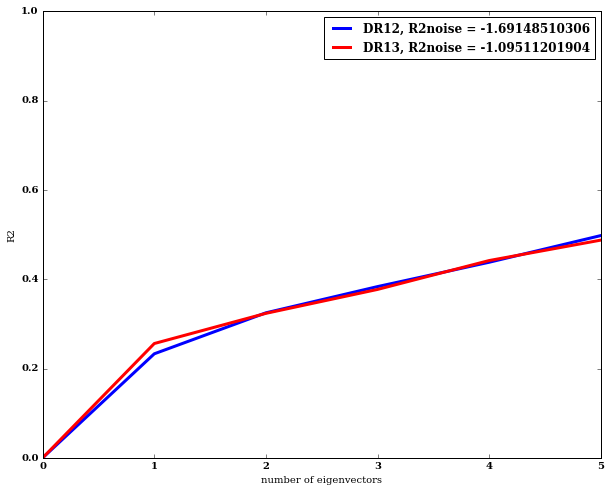

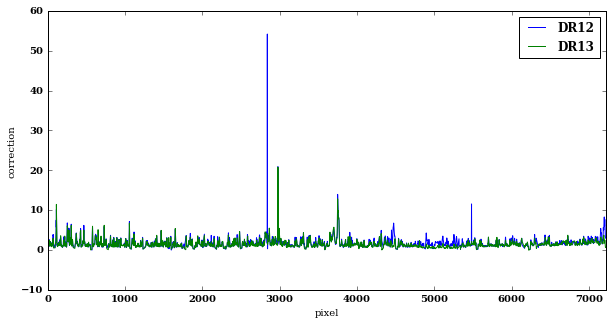

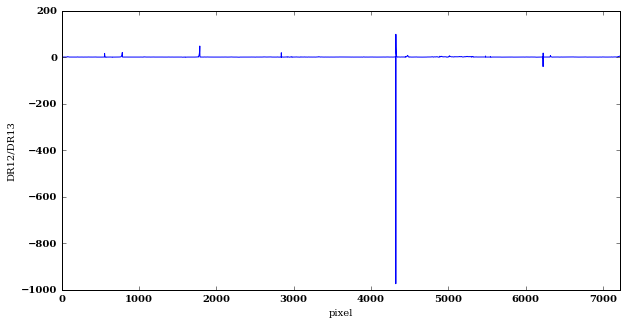

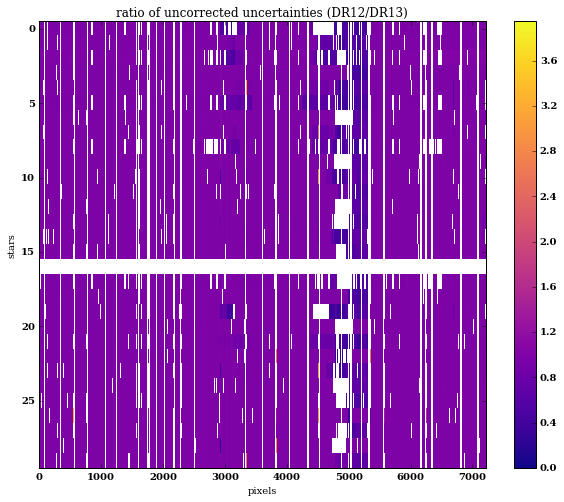

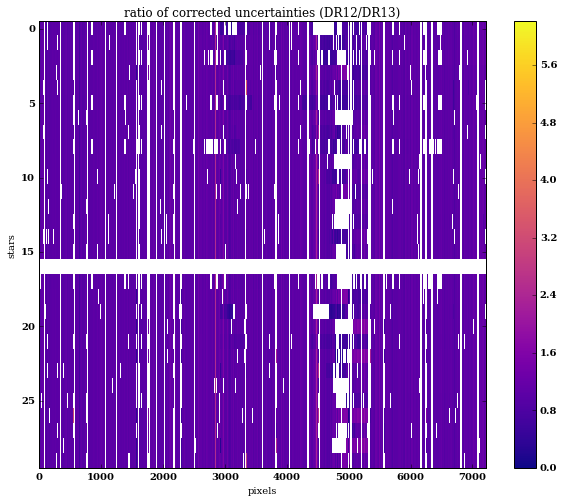

In [29]:
empca_compare(corr12=corr12,corr13=corr13)